**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Kien Do<br/>
Student Number: 300163370

# Exploratory Analysis

## Import important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import sklearn

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [2]:
# Dataset URLs uploaded to my own repo
datasets_urls: dict[str, list[str]] = {
    "01": ["https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/01_glass/glass.csv"],
    "02": ["https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/02_dermatology/dermatology_database_1.csv"],
    "03": ["https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/03_maternal/Maternal%20Health%20Risk%20Data%20Set.csv"],
    "04": [
        "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/04_car/car.c45-names",
        "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/04_car/car.data",
        # "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/04_car/car.names" # this is documentation, not data
    ],
    "05": ["https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/05_wine/WineQT.csv"],
    "06": [
        "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/06_personalities/16P.csv",
        # "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/06_personalities/16p-Mapping.txt"
    ],
    "07": [
        "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/07_credit_scores/test.csv",
        "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/07_credit_scores/train.csv"
    ],
}

# Dataframes. Datasets will be read into these dataframes.
dataframes: dict[str, list[str]] = {}

# Read each dataset and store it in the dataframes list.
for topic, urls in datasets_urls.items():
    dataframes[topic] = []
    print(f"Reading dataset '{topic}'")

    for url in urls:        
        try:
            if topic == "04":
                # uses c45 formatting, where multiple files are used to provide info about a dataset
                if url == "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/04_car/car.data":
                    # Attribute names based on the car.c45-names file
                    column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

                    dataset = pd.read_csv(url, names=column_names)
                    dataframes[topic].append(dataset)
                else:
                    continue
            if topic == "06":  # uses 'cp1252' encoding, not 'utf8':
                dataset = pd.read_csv(url, encoding="cp1252", low_memory=False)
                dataframes[topic].append(dataset)
            else:
                dataset = pd.read_csv(url, low_memory=False)
                dataframes[topic].append(dataset)
        except Exception as e:
            print(f"Failed to read dataset from {url}: {e}")

Reading dataset '01'
Reading dataset '02'
Reading dataset '03'
Reading dataset '04'
Reading dataset '05'
Reading dataset '06'
Reading dataset '07'


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

In [3]:
# Define missing value symbols to ensure any occurence of these symbols is automatically converted to NaN when reading the dataset
missing_value_placeholders: list[str] = ["?", "", "N/A", "null", "NULL"]

# Dictionary to store results of missing values
missing_values_report: dict = {}

# Check each dataset in the list of dataframes
for topic, dataset_list in dataframes.items():
    for i, dataset in enumerate(dataset_list):
        # Use na_values to specify what should be treated as missing
        dataset = dataset.replace(missing_value_placeholders, pd.NA)  # Replace placeholders with NaN

        # Check for missing values in each column
        missing_values = dataset.isnull().sum()  # isnull() detects missing values, sum() tells us how many missing values are in a column
        
        # Check if any column has missing values
        missing_columns = missing_values[missing_values > 0]

        if not missing_columns.empty:
            # Report which columns have missing values and how many missing values
            missing_values_report[f"Topic_{topic}_Dataset_{i+1}"] = missing_columns

# Print the report
if missing_values_report:
    print("Datasets with missing values:\n")
    for dataset_name, columns in missing_values_report.items():
        print(f"{dataset_name}:")
        print(columns)
        print()
    print("=========================")
else:
    print("No missing values found in any dataset.")

Datasets with missing values:

Topic_02_Dataset_1:
age    8
dtype: int64

Topic_07_Dataset_1:
Name                       5015
Monthly_Inhand_Salary      7498
Type_of_Loan               5704
Num_of_Delayed_Payment     3498
Num_Credit_Inquiries       1035
Credit_History_Age         4470
Amount_invested_monthly    2271
Monthly_Balance             562
dtype: int64

Topic_07_Dataset_2:
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64



**1. Explanation**

**1.1.**

The code above found that dataset 07 has missing values.
A quick manual verification shows that it is true.

In `test.csv`, we have a row that has a missing `Name` value.
- Example: `0x2bf1,CUS_0x83a4,December,,46,167-34-4316,Writer,69577.92,5882.16,...`

In `dermatology_database_1.csv`, the `age` attribute is missing a value in some rows too.
- Example: `2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,?,1`

Other manual checking also shows us that columns like `SSN` also have corrupted data, but are more difficult to detect using automation, since the value is not missing, it's just corrupted.
- Example: `0x2bc0,CUS_0x768c,November,Margaret Chadbournu,25,#F%$D@*&8,_______,53908.41_,...`
- Here, `SSN` is `#F%$D@*&8`

**1.2.**

We automate the work of finding missing values in the 7 datasets by iterating through every value of every column of every dataset, then count the number of missing values, defined as any symbol in the following list `["?", "", "N/A", "null", "NULL"]`.

**1.3.**

There are various ways to deal with corrupt data. For numerical attributes, we can replace missing values with the mean, median, or mode of the available data. For categorical attributes, we can replace missing values with the most frequent categories (mode), or simply put "Unknown".

We can also use machine learning techniques to "predict" what those missing values could likely be. For isntance, we can apply linear regression to numerical data to predict missing values based on other features.

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?


**2. Explanation**

I will select the 16 Personalities dataset (dataset 06) because of its large size and minimal missing values. Its large size (60,000 rows) will ensure accurate results when applying ML algorithms, and its minimal missing values will reduce the amount of work required in the data preprocessing stage.

The objective of the task is to predict an individual's personality type based on their responses to the questions listed in the dataset. The final column "Personality", is the class label that we aim to predict.

Some specific applications for this classification task include personality prediction for psychological evaluations, career counselling, tailored marketing, recommendation systems, self-improvement, or company hiring.

I do not posses expertise in this domain. That said, I am familiar with the concept of personality testing, such as Myers-Briggs tests, which is used in psychological evaluations, career counseling, and personal development.

In [4]:
# Select the dataset which I will work with for the rest of the assignment
df = pd.read_csv(
    "https://raw.githubusercontent.com/kienmarkdo/CSI4106-AI/main/A1/06_personalities/16P.csv",
    encoding="cp1252",
    low_memory=False
)

3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

**3.1 Explanation**

Attributes that lack informativeness are those that have constant values (same value for all or most samples), have too many missing values, have no relationship to the target prediction, or are redundant (two highly correlated attributes).

Given that this is a personality test where every question has been clearly thought out and created to judge a person's personality, I believe that all features are relevant in the classification task.

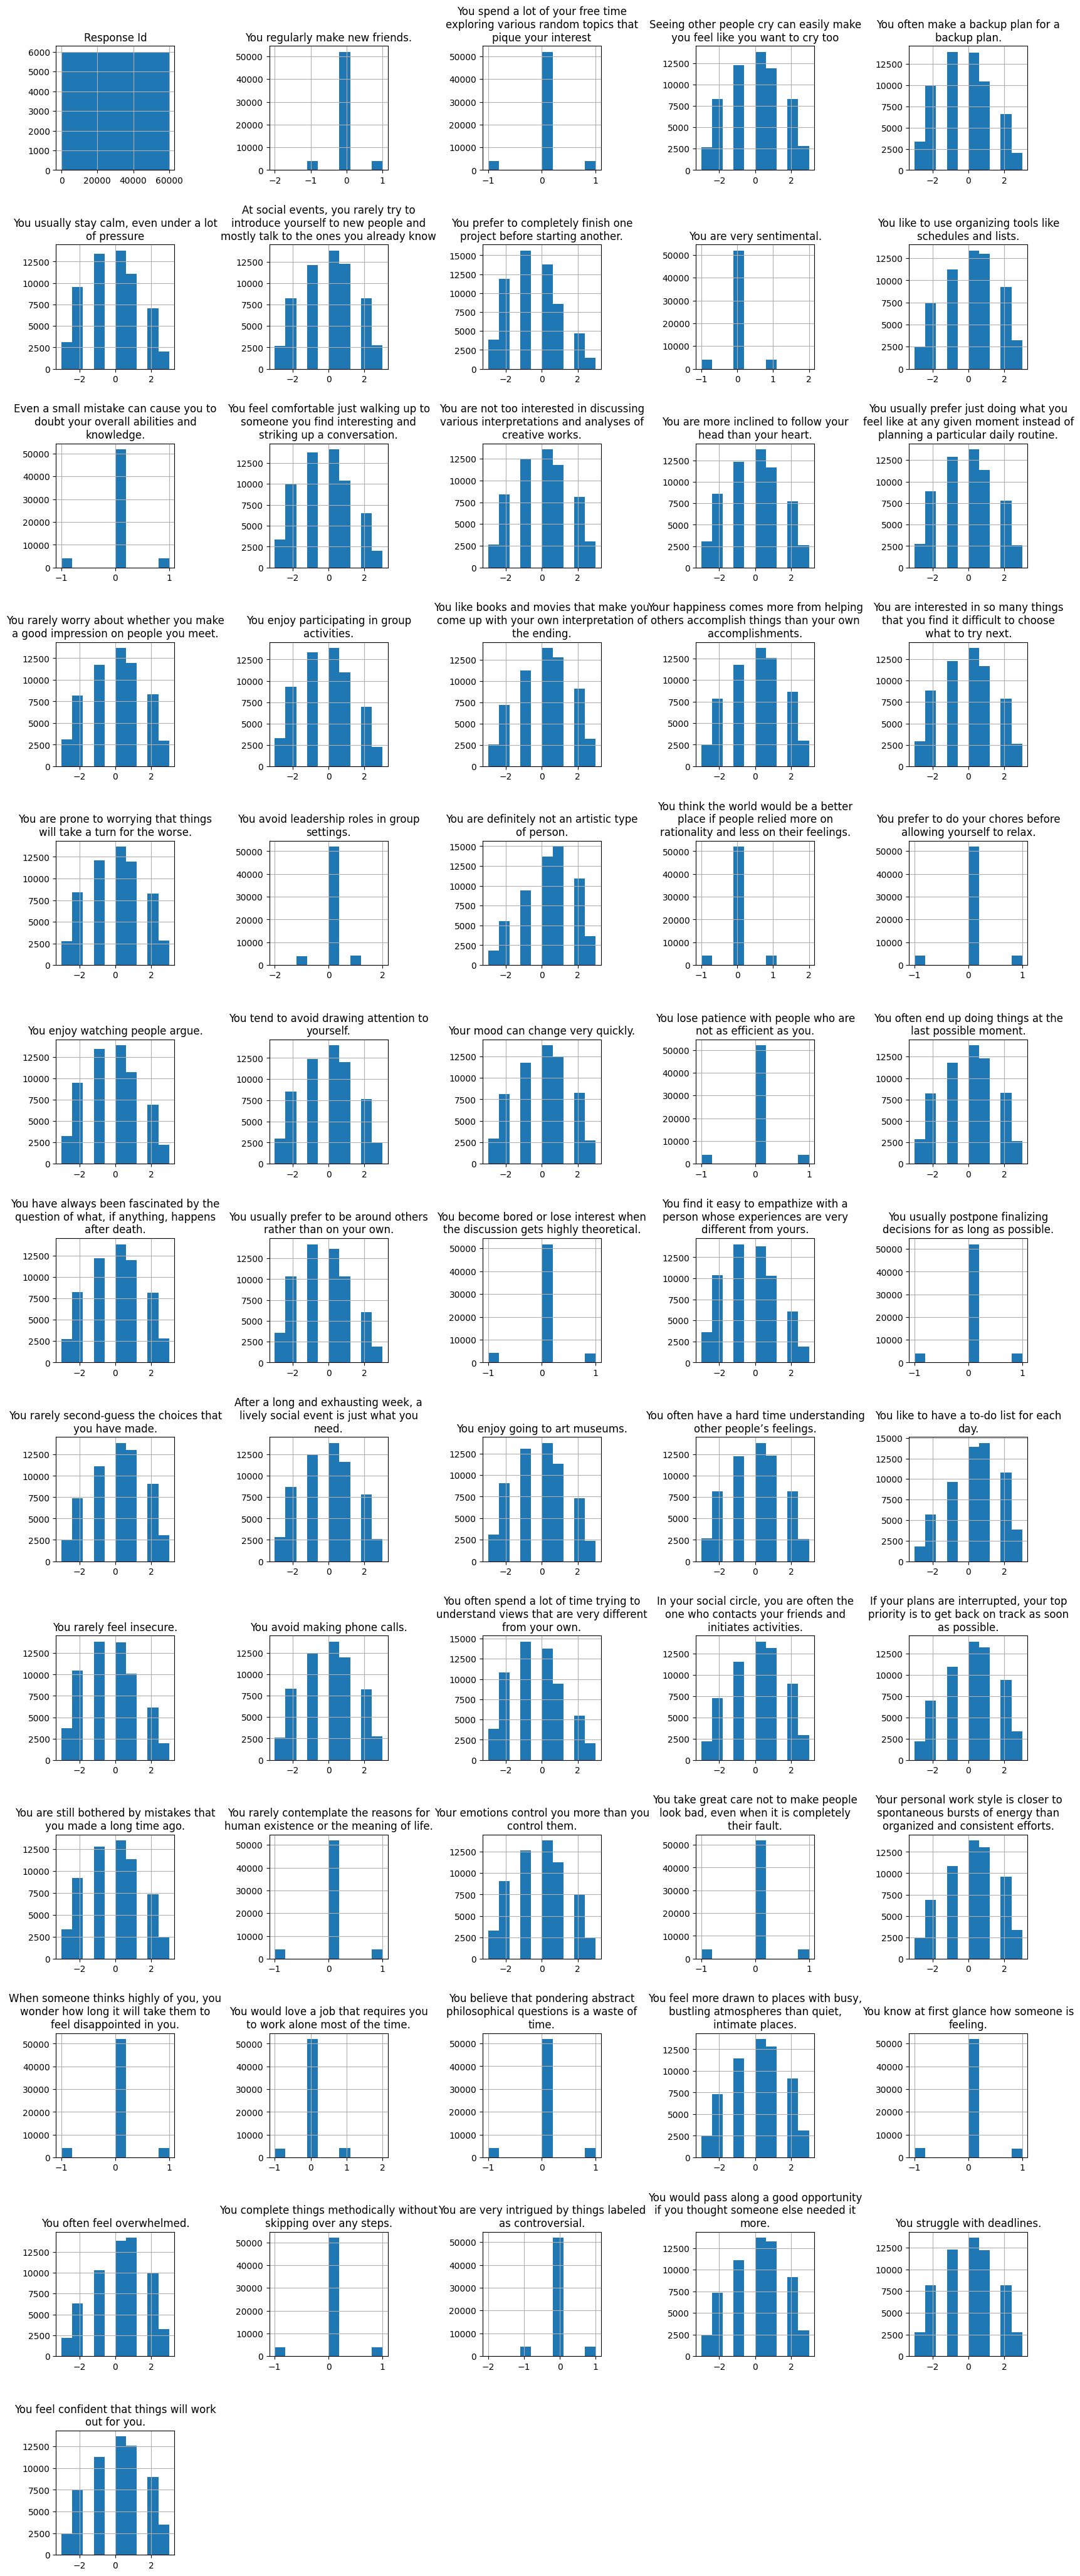

In [5]:
# Code to check attribute informativeness to confirm my statement that all attributes of the data are relevant
# NOTE: This code snippet was generated by ChatGPT.

# ==================    Identify columns with constant values    ================== #
# Custom wrapper for long labels
def wrap_labels(ax, max_chars=40):
    labels = [textwrap.fill(label.get_text(), max_chars) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0, ha='center')

# Number of columns in the DataFrame
num_columns = len(df.columns) - 1  # Exclude the target column 'Personality'

# Calculate the number of rows and columns needed for subplots
nrows = (num_columns // 5) + 1 if num_columns % 5 != 0 else num_columns // 5
ncols = 5

# Plot histograms with better spacing
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))  # Adjust figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, col in enumerate(df.columns[:-1]):  # Exclude the target column 'Personality'
    df[col].hist(ax=axes[i])
    axes[i].set_title(textwrap.fill(col, 40))  # Wrap title labels

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust space between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.8)  # Increase the horizontal and vertical space

# Show the plot
plt.show()


**3.2 Explanation**

From the histograms above, we see that some data points have higher variation than others. We see that a lot of the data is located at 0. This is likely due to the fact that participants do not tend to give answers where they are 100% sure of the answer (e.g. strongly agree is 3, strongly disagree with -3), so their answers are closer to 0.

Some responses are predominantly centered at 0. For instance, "You complete things methodically without skipping over any steps", "You regularly make new friends", or "You avoid leadership roles in group settings". While others are more varied. For instance, "You feel confident that things will work out for you".

I believe all of the responses should be kept in the classification task, as a response like "You regularly make new friends" could affect the outcome of whether a person is extroverted or introverted. These responses with low variance, in combination with the ones with high variance, will have an effect on the classification task.

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

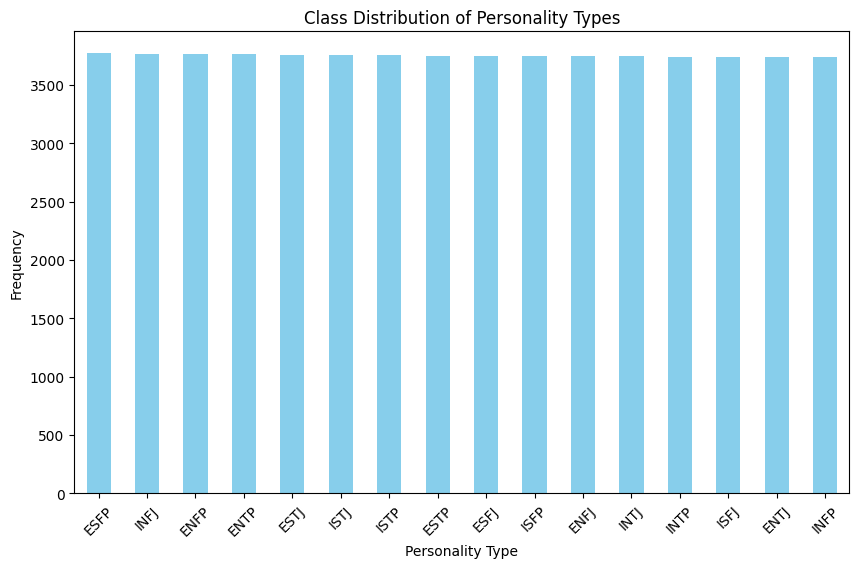

Personality
ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ESFJ    3746
ISFP    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: count, dtype: int64


In [6]:
# NOTE: This code snippet was generated by ChatGPT

# Step 1: Count the frequency of each personality type (class labels)
class_counts = df['Personality'].value_counts()

# Step 2: Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Step 3: Display the class counts for reference
print(class_counts)

**4. Explanation**

With the code snippet above, which counts the frequency of each personality type, we can observe that there is roughly 3700 people belonging to each personality type in this dataset. Moreover, the difference between the smallest count (3734 - INFP) and the largest count (3769 - ESFP) is minimal. This demonstrates that we have a balanced dataset, which is desirable in ML classification tasks as it helps the model learn equally from all of the classes, by reducing bias toward majority classes, ensuring that no personality type is overrepresented or underrepresented.

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

**5.1 Explanation**

All of the features are responses to survey questions. These responses are ordinal numerical values that range from -3 (strongly disagree) to 3 (strongly agree).

Given that these responses are ordinal numerical values, the best transformation to use would be to standardize or normalize the values.

- To standardize the data is to make the data have a mean of 0 and a deviation of 1.
- To normalize the data is to scale the data such that all values fall between -1 and 1 (e.g. the largest value be 1, the smallest value be -1, and every other value fit between -1 and 1, inclusive).

Many ML algorithms like K-NN or SVN perform better when the numerical features are on the same scale, this is why we would want to standardize or normalize the data.

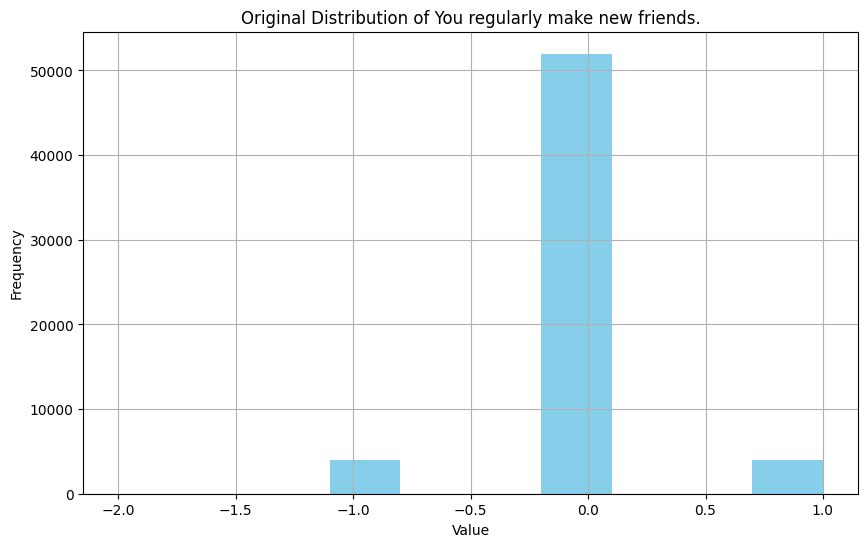

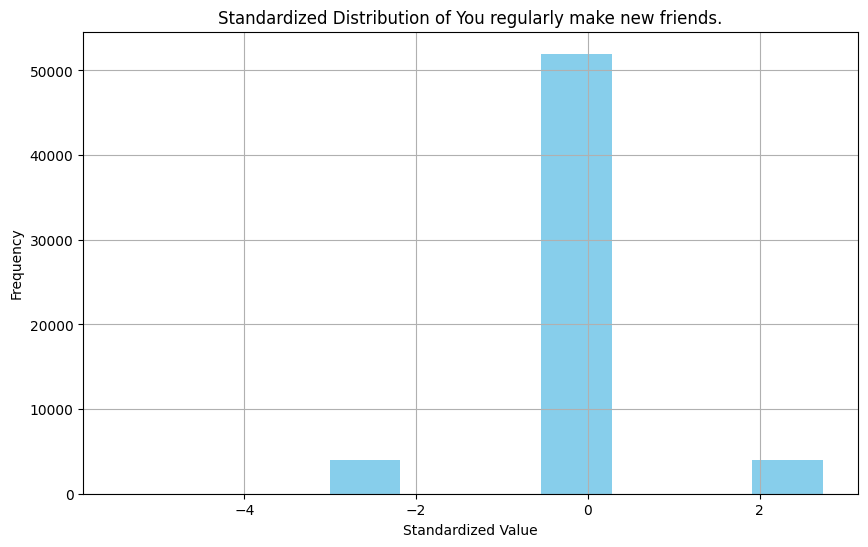

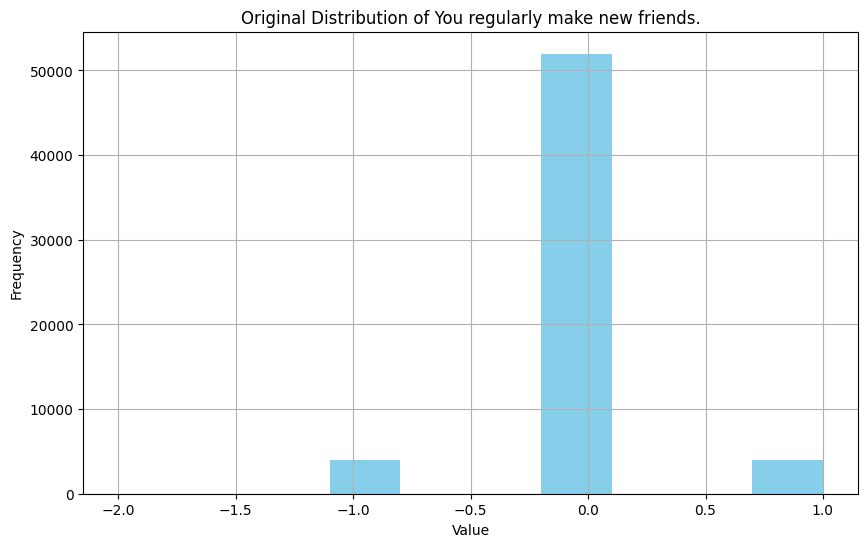

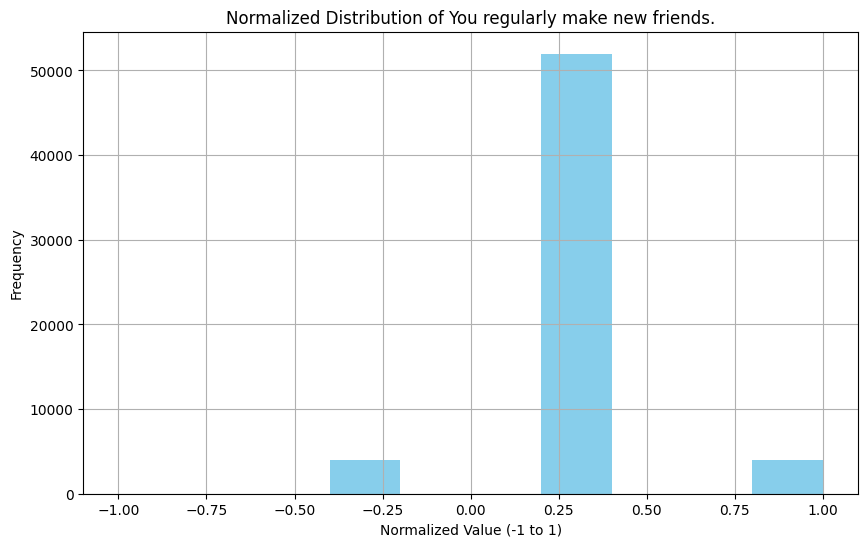

In [12]:
# The code below shows the distribution of "you regularly make new friends" before and after standardization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

feature = "You regularly make new friends."

# Plot the original distribution
plt.figure(figsize=(10, 6))
df[feature].hist(bins=10, color="skyblue")
plt.title(f"Original Distribution of {feature}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Step 1: Standardize the feature
scaler = StandardScaler()
df[feature + "_scaled"] = scaler.fit_transform(df[[feature]])

# Plot the standardized distribution
plt.figure(figsize=(10, 6))
df[feature + "_scaled"].hist(bins=10, color="skyblue")
plt.title(f"Standardized Distribution of {feature}")
plt.xlabel("Standardized Value")
plt.ylabel("Frequency")
plt.show()

# ================================================================= #

# The code below shows the distribution of "you regularly make new friends" before and after normalization
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

feature = "You regularly make new friends."

# Plot the original distribution
plt.figure(figsize=(10, 6))
df[feature].hist(bins=10, color="skyblue")
plt.title(f"Original Distribution of {feature}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Step 1: Apply Min-Max Normalization to scale between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
df[feature + "_normalized"] = scaler.fit_transform(df[[feature]])

# Plot the normalized distribution
plt.figure(figsize=(10, 6))
df[feature + "_normalized"].hist(bins=10, color="skyblue")
plt.title(f"Normalized Distribution of {feature}")
plt.xlabel("Normalized Value (-1 to 1)")
plt.ylabel("Frequency")
plt.show()

**5.2 Explanation**

The target variable, "Personality", is categorical, representing the 16 different personality types. To use this target variable in an ML model, we cannot simply represent them as "ENFP", "INFP", etc. We need a way to represent these values numerically, such that the data can be used in an ML model.

The technique of one-hot encoding converts each class (personality type) into a binary value, where 1 is true, 0 is false. For instance, if a dataset has an attribute whose values are "red", "green", or "blue", we would represent "red" with 100, "green" with 010, and "blue" with 001. Now that these categorical values are numerical, ML models can now work with them.

Moreover, one-hot encoding ensures that no ordinal relationship is implied between categories. For instance, if we were to represent "red" as 1, "green" as 2, "blue" as 3, the model might be confused, thinking that there is an order or ranking between the values (e.g. "blue" is "larger" than "red").

So, for our data, since there are 16 personalities (i.e. ENFJ, ENFP, ENTJ, etc.), we would have 16 digits in our one-hot encoded value. For example: ENFJ = `1000000000000000`, ENFP = `0100000000000000`, ENTJ = `0010000000000000`, etc.

In [25]:
from sklearn.preprocessing import OneHotEncoder

print("==============================================================================")
print("""First 5 Rows of the original 16P.csv dataset

Response Id, ..., Personality
0, ..., ENFP
1, ..., ISFP
2, ..., INFJ
3, ..., ISTP
4, ..., ENFJ
""")
print("==============================================================================")
print("Equivalent first 5 rows of the 16P.csv dataset, but one-hot encoded\n")

# Instantiate the one-hot encoder
encoder = OneHotEncoder(
    sparse_output=False
)

# Fit and transform the 'Personality' column
personality_encoded = encoder.fit_transform(df[["Personality"]])

# Convert to DataFrame to visualize the result
personality_df = pd.DataFrame(personality_encoded, columns=encoder.categories_[0])

# Show first few rows of the encoded result
print(personality_df.head())

# Concatenate the new encoded features back into the original DataFrame
df = pd.concat([df, personality_df], axis=1)

First 5 Rows of the original 16P.csv dataset

Response Id, ..., Personality
0, ..., ENFP
1, ..., ISFP
2, ..., INFJ
3, ..., ISTP
4, ..., ENFJ

Equivalent first 5 rows of the 16P.csv dataset, but one-hot encoded

   ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   ISFJ  ISFP  ISTJ  ISTP  
0   0.0   0.0   0.0   0.0  
1   0.0   1.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   1.0  
4   0.0   0.0   0.0   0.0  


6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [8]:
# Your code goes here

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [9]:
# Your code goes here

--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".